# Analysis

There are two classes for analysis: Alternative which provides methods for a [Cost Benefit Analysis](https://en.wikipedia.org/wiki/Cost–benefit_analysis) and Decision which provides methods for a [Multiple Criteria Analysis](https://en.wikipedia.org/wiki/Multiple-criteria_decision_analysis). The Timeline class generates a [Gantt Chart](https://en.wikipedia.org/wiki/Gantt_chart).

## Alternative

In [1]:
from datetime import datetime, timedelta
from dpd.analysis import Activity, Alternative, Currency

USD = Currency("USD", 2020, 0.07).discount()

a1 = Alternative(name="Alternative One")
planning = Activity(
    "Planning", datetime(2005, 1, 1), datetime(2009, 12, 31), 100 * USD, 0 * USD
)
construction = Activity(
    "Construction", datetime(2010, 1, 1), datetime(2014, 12, 31), 100 * USD, 0 * USD
)
operations = Activity(
    "Operations",
    construction.End,
    construction.End + timedelta(days=365 * 20 + 4),
    0 * USD,
    400 * USD,
)

for activity in [planning, construction, operations]:
    a1.add_activity(activity)

a1

,Start,End,Cost,Benefit
Planning,2005-01-01,2009-12-31,100.0 USD (2020),0.0 USD (2020)
Construction,2010-01-01,2014-12-31,100.0 USD (2020),0.0 USD (2020)
Operations,2014-12-31,2034-12-30,0.0 USD (2020),400.0 USD (2020)


In [2]:
a1.benefit_cost_ratio

<Quantity 2.>

In [3]:
a1.period_range_pivot().head()

Cost                                 Benefit               \
             Planning Construction Operations        Planning Construction   
2005  20.0 USD (2020)          NaN        NaN  0.0 USD (2020)          NaN   
2006  20.0 USD (2020)          NaN        NaN  0.0 USD (2020)          NaN   
2007  20.0 USD (2020)          NaN        NaN  0.0 USD (2020)          NaN   
2008  20.0 USD (2020)          NaN        NaN  0.0 USD (2020)          NaN   
2009  20.0 USD (2020)          NaN        NaN  0.0 USD (2020)          NaN   

                 
     Operations  
2005        NaN  
2006        NaN  
2007        NaN  
2008        NaN  
2009        NaN

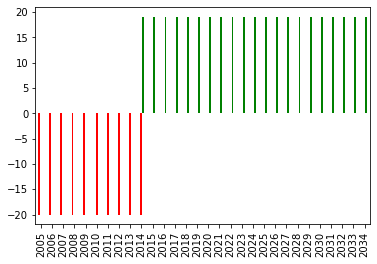

In [4]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

a1.cash_flow_diagram(ax=ax)
ax.get_legend().remove()

## Timeline

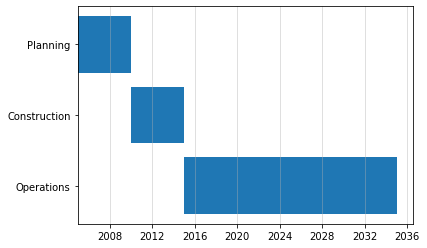

In [5]:
from dpd.analysis import Timeline

t = Timeline()
for activity in [planning, construction, operations]:
    t.add_activity(activity)

fig, ax = plt.subplots()
t.plot_gantt(ax=ax)
plt.show()

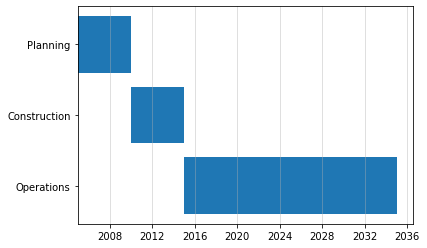

In [6]:
fig, ax = plt.subplots()
a1.timeline.plot_gantt(ax=ax)
plt.show()

## Decision

In [7]:
from datetime import datetime
from random import randint

from astropy import units

from dpd.analysis import Alternative, Currency, Decision
from dpd.analysis.criteria import AttributeCriterion, CostCriterion, Criterion

USD = Currency("USD", 2020, 0.07).discount()
decision = Decision()

no_build_alternative = Alternative("No Build Alternative")
no_build_alternative.some_cost = 0 * USD
alternative_one = Alternative("Alternative 1")
alternative_one.some_cost = 100 * USD
alternative_two = Alternative("Alternative 2")
alternative_two.some_cost = 200 * USD


@property
def travel_time(self):
    return randint(100, 200) * units.second


setattr(Alternative, "travel_time", travel_time)

decision.add_criterion(AttributeCriterion("Travel Time", weight=1 / units.second))
decision.add_criterion(
    Criterion("Distance", lambda x: 200 * units.meter, weight=1 / units.meter)
)
decision.add_criterion(AttributeCriterion("Some Cost", weight=1 / USD))

for alternative in [no_build_alternative, alternative_one, alternative_two]:
    decision.add_alternative(alternative)

decision

,Travel Time,Distance,Some Cost
No Build Alternative,131.0 s,200.0 m,0.0 USD (2020)
Alternative 1,106.0 s,200.0 m,100.0 USD (2020)
Alternative 2,113.0 s,200.0 m,200.0 USD (2020)


<AxesSubplot:>

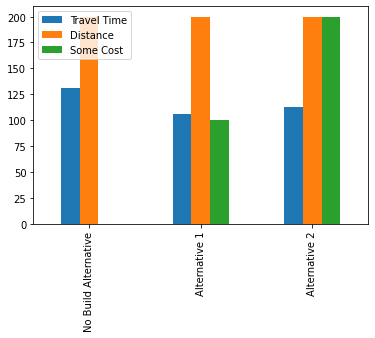

In [8]:
decision.plot(kind="bar")

<AxesSubplot:>

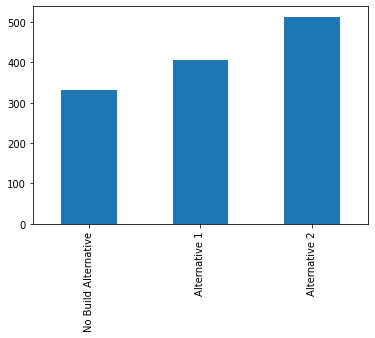

In [9]:
decision.multiple_criteria_decision_analysis().plot(kind="bar")

## Values

In [10]:
from dpd.analysis.values import (
    Value_of_Reduced_Fatalities_and_Injuries,
    Value_of_Travel_Time_Savings,
)

In [11]:
Value_of_Reduced_Fatalities_and_Injuries

O - No Injury                         3900.0 USD (2020)
C - Possible Injury                  77200.0 USD (2020)
B - Non-incapacitating              151100.0 USD (2020)
A - Incapacitating                  554800.0 USD (2020)
K - Killed                        11600000.0 USD (2020)
U - Injured (Severity Unknown)      210300.0 USD (2020)
Injury Crash                        302600.0 USD (2020)
Fatal Crash                       12837400.0 USD (2020)
Name: Value of Reduced Fatalities and Injuries, dtype: object

In [12]:
Value_of_Travel_Time_Savings

General Travel Time - Personal                           16.2 USD (2020) / (h person)
General Travel Time - Business                           29.4 USD (2020) / (h person)
General Travel Time - All Purposes                       17.8 USD (2020) / (h person)
Walking Cycling, Waiting, Standing, and Transfer Time    32.4 USD (2020) / (h person)
Commercial Vehicle Operators - Truck Drivers             32.0 USD (2020) / (h person)
Commercial Vehicle Operators - Bus Drivers               33.6 USD (2020) / (h person)
Commercial Vehicle Operators - Transit Rail Operators    50.7 USD (2020) / (h person)
Commercial Vehicle Operators - Locomotive Engineers      52.5 USD (2020) / (h person)
Name: Value of Travel Time Savings, dtype: object

In [13]:
from astropy.units import day, minute, year
from dpd.analysis.units import person, usd

In [14]:
(
    5
    * minute
    * 40000
    * person
    / day
    * Value_of_Travel_Time_Savings[
        "Walking Cycling, Waiting, Standing, and Transfer Time"
    ]
).decompose().to(usd / year)

<Quantity 39447000.00000001 USD (2020) / yr>